In [ ]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread("/content/IMG-20250203-WA0052.jpg")
if image is None:
    print("Error: Image not found.")
    exit()

original = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [ ]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


In [ ]:
edges = cv2.Canny(blurred, 50, 150)


In [ ]:
contours, _ = cv2.findContours(
    edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)


In [ ]:
largest_contour = None
max_area = 0

for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        largest_contour = contour


In [ ]:
x, y, w, h = cv2.boundingRect(largest_contour)


In [ ]:
cv2.rectangle(original, (x, y), (x + w, y + h),
              (0, 255, 0), 2)


array([[[109, 128, 136],
        [109, 128, 136],
        [106, 126, 137],
        ...,
        [108, 126, 137],
        [108, 126, 137],
        [109, 127, 138]],

       [[109, 128, 136],
        [109, 128, 136],
        [106, 126, 137],
        ...,
        [108, 126, 137],
        [108, 126, 137],
        [109, 127, 138]],

       [[109, 128, 136],
        [109, 128, 136],
        [106, 126, 137],
        ...,
        [108, 126, 137],
        [108, 126, 137],
        [109, 127, 138]],

       ...,

       [[ 98, 107, 117],
        [ 98, 107, 117],
        [ 98, 107, 117],
        ...,
        [119, 131, 143],
        [120, 132, 142],
        [120, 132, 142]],

       [[ 98, 107, 117],
        [ 98, 107, 117],
        [ 98, 107, 117],
        ...,
        [119, 131, 143],
        [120, 132, 142],
        [120, 132, 142]],

       [[ 98, 107, 117],
        [ 98, 107, 117],
        [ 98, 107, 117],
        ...,
        [119, 131, 143],
        [120, 132, 142],
        [121, 133, 143]]

In [ ]:
print("ID Card Dimensions:")
print(f"Width  : {w} pixels")
print(f"Height : {h} pixels")


ID Card Dimensions:
Width  : 1054 pixels
Height : 467 pixels


(np.float64(-0.5), np.float64(1599.5), np.float64(899.5), np.float64(-0.5))

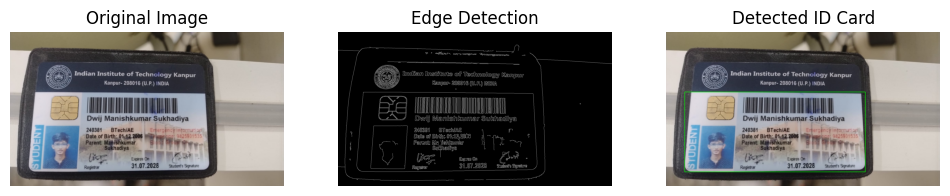

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 3, 2)
plt.title("Edge Detection")
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.title("Detected ID Card")
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.axis("off")
